# Dados Campus Sertãozinho


In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
dados = pd.read_csv('Relatorio_novo_1.CSV')

In [103]:
dados = dados.loc[dados['Modalidade'] != "FIC"]

# Filtros

In [104]:
dados = dados.drop(["Matrícula"],axis = 1)

In [105]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

In [106]:
dados = dados.loc[dados['Modalidade'] == 'Mestrado']
dados

,#,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Renda Per Capita,Sexo,Situação no Curso,Tipo de Escola de Origem
12,13,2023,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,RJ,Preta,Edital de Seleção NaN Aluno especial / Não reg...,Mestrado,Brasileira,NaN,M,Matriculado,NaN
25,26,2018,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,SP,Parda,Ampla Concorrência (Vestibular),Mestrado,Brasileira,2,F,Concluído,Privada
28,29,2021,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,BA,Parda,Edital de Seleção NaN Aluno especial / Não reg...,Mestrado,Brasileira,NaN,M,Concluído,Pública
37,38,2019,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,ES,Não declarado,Edital de Seleção NaN Aluno especial / Não reg...,Mestrado,Brasileira,"3,11",M,Concluído,Pública
62,63,2018,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,SP,Branca,Ampla Concorrência (Vestibular),Mestrado,Brasileira,0,F,Cancelamento Compulsório,Privada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11369,11370,2022,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,SP,Branca,Ingresso pósNaNgraduação: ampla concorrência,Mestrado,Brasileira,NaN,F,Matriculado,Pública
11560,11561,2019,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,RJ,Preta,Edital de Seleção NaN Aluno especial / Não reg...,Mestrado,Brasileira,"0,67",M,Concluído,Pública
11710,11711,2023,PCD,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,RJ,Preta,Edital de Seleção NaN Aluno especial / Não reg...,Mestrado,Brasileira,NaN,M,Matriculado,Pública
11821,11822,2021,Sem Necessidade Especial,MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL...,SP,Parda,Ingresso pósNaNgraduação: ampla concorrência,Mestrado,Brasileira,"1,52",M,Matrícula Vínculo Institucional,NaN


# Número de alunos

In [107]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [108]:
import matplotlib.pyplot as plt

In [109]:
dados['Ano de Ingresso'].value_counts()


2019    76
2023    73
2022    68
2018    53
2020    47
2021    42
2017    24
Name: Ano de Ingresso, dtype: int64

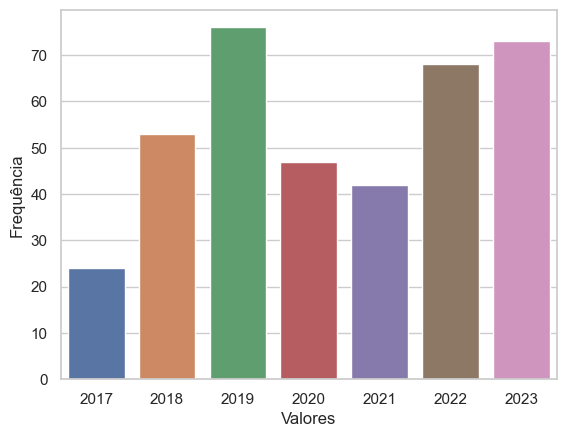

In [110]:
# Para começar a análise dos dados foi relevante enxergar o número de alunos em geral no campus Sertãozinho com o decorrer dos anos.
sns.countplot(x = dados['Ano de Ingresso'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10

# Raça

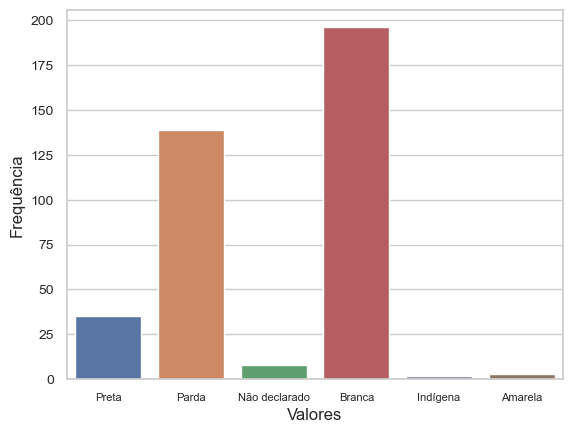

In [111]:
# A primeira informação buscada na análise foi relacionada com raça/etnia/cor, no primeiro gráfico
# é possível observar a quantidade de alunos de cada raça/etnia/cor e também os que não declararam no campus Sertãozinho. 
# Podemos perceber graficamente que o número de brancos é alto em comparação com o restante.
sns.countplot(x = dados['Etnia/Raça/Cor'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

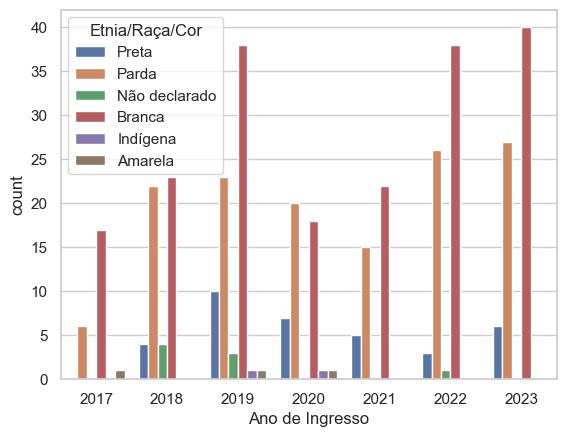

In [112]:
# Após analisarmos a quantidade bruta de alunos com relação a raça/cor/etnia, agora podemos analisar no gráfico 
# a quantidade através dos anos, é possível notar que até dois mil e quinze o alunos quase não se declaravam, após esse ano é possível
# ver que há um aumento significativo no nos alunos se declarando e uma clara diminuição nos que não se declaram.

sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Etnia/Raça/Cor')

plt.show()

In [113]:
dados['Etnia/Raça/Cor'].value_counts()

Branca           196
Parda            139
Preta             35
Não declarado      8
Amarela            3
Indígena           2
Name: Etnia/Raça/Cor, dtype: int64

# Tipo de escolaridade

<Axes: xlabel='Tipo de Escola de Origem', ylabel='count'>

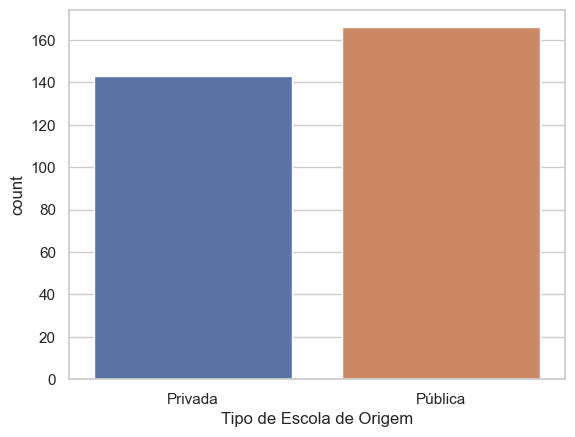

In [114]:
# Neste novo tópico será possivel analisar a escolaridade de origem dos alunos, sendo pública ou privada, uma informação 
# importante para os próximos passos do projeto. No gráfico a seguir existe uma diferença grande entre público e privado, com público sendo maior. 
sns.countplot(x = dados['Tipo de Escola de Origem'])

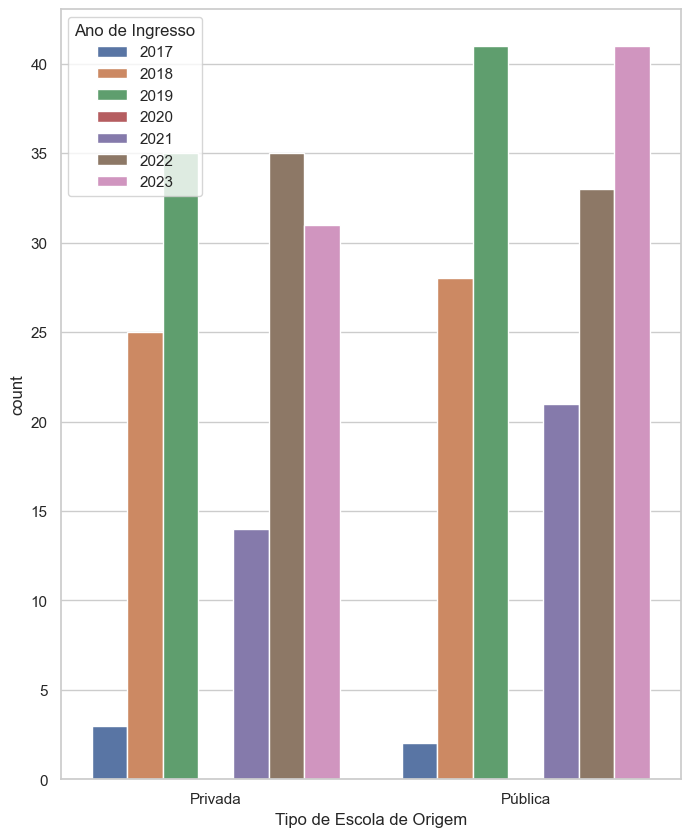

In [115]:
# No gráfico a seguir é possível ver o número de alunos e suas escolaridades de origem ao decorrer dos anos, é interessante analisar
# um aumento de ambas, pública e privada, nos anos de 2021 e 2022, anos de pandemia.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Tipo de Escola de Origem', hue='Ano de Ingresso')
plt.show()

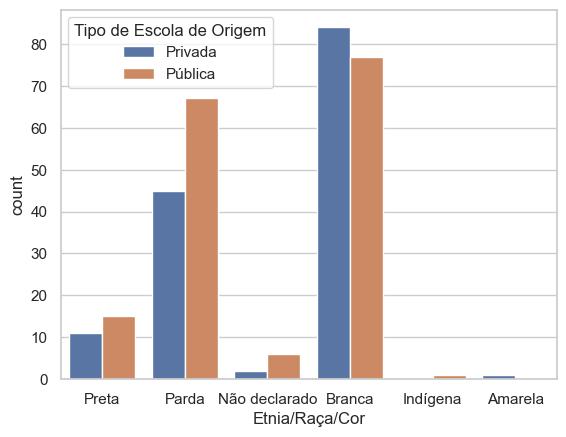

In [116]:
# Outra informação batante relevante para este estudo é mostrado no gráfico abaixo, onde existe uma disparidade alta entre 
# escolas de origem pública e privada, principalmente entre os alunos brancos.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Tipo de Escola de Origem')
plt.show()

In [117]:
dados['Descrição do Curso'].value_counts()

MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA EM REDE NACIONAL (PROFEPT)    383
Name: Descrição do Curso, dtype: int64

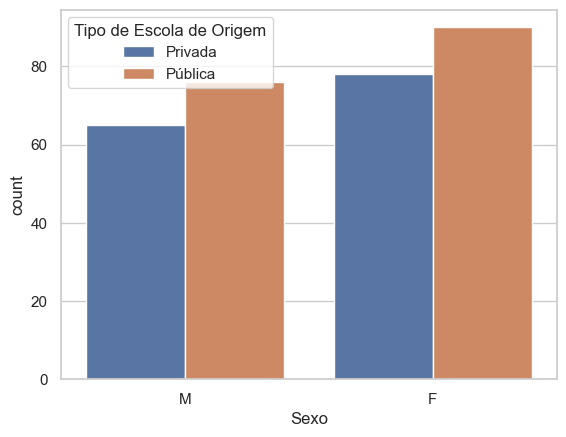

In [118]:
# Nas próximas conclusões que foram possíveis tirar a partir do gráfico abaixo, vemos a diferença entre
# o número de alunos de gênero masculino e feminino com relção a escola de origem, sendo bem perceptível um equilibrio.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Tipo de Escola de Origem')
plt.show()

# Gênero

<Axes: xlabel='Sexo', ylabel='count'>

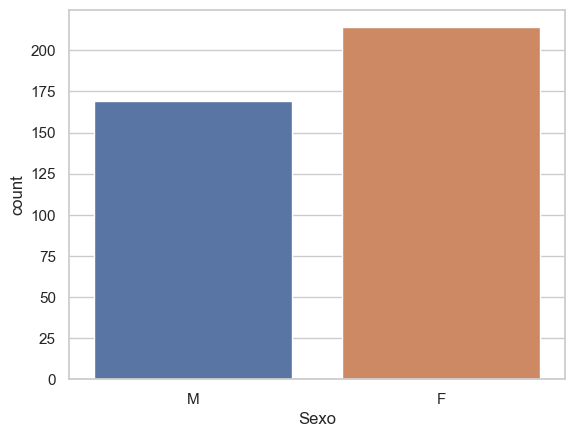

In [119]:
# Agora será feita uma ánalise sobre questões de gênero. Primeiro o gráfico a seguir mostra um equilíbrio entre o número geral de 
# homens e mulheres no campus. Um adendo importante é que os dados se resumem apenas a gênero masculino e feminino. 
sns.countplot(x = dados['Sexo'])

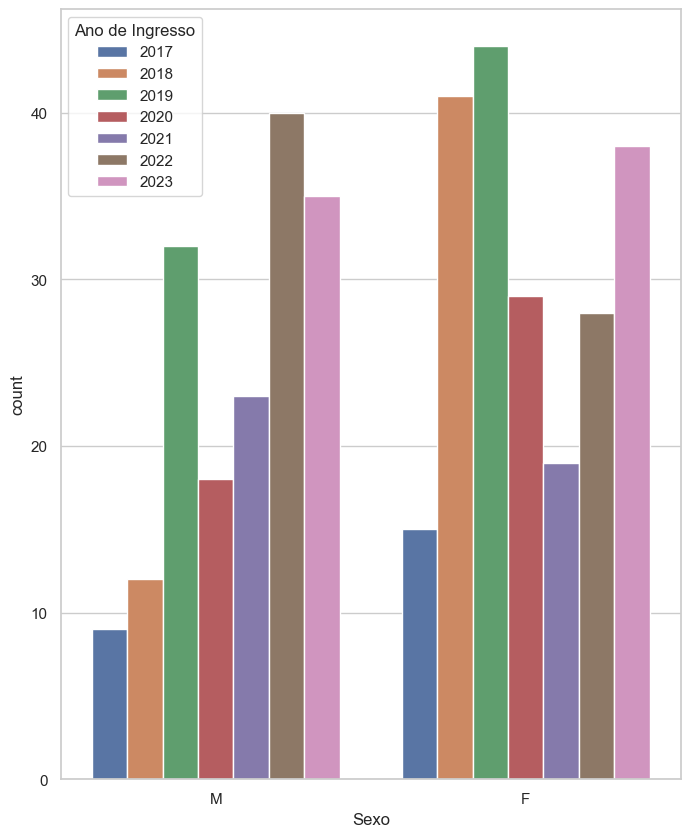

In [120]:
# É possível concluir a partir do próximo gráfico e dos anteriores também, um aumente relevante de alunos, de ambos os gêneros 
# analisados, nos anos de pandemia, pricnipalamente para mulheres no ano de dois mil e vinte um.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Ano de Ingresso')
plt.show()

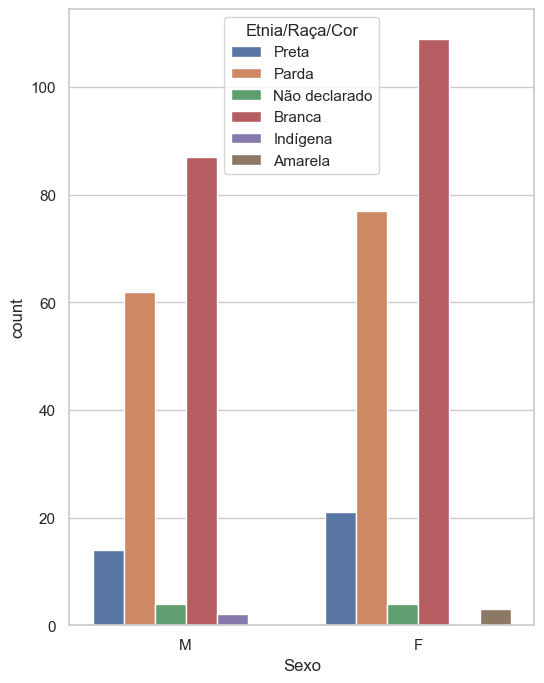

In [121]:
# Com relação a raça, o gráfico a seguir mostra, assim como analisado anteriormente, um grande número de alunos brancos e seguidos 
# por alunos pardos com uma certa distância.
plt.figure(figsize= (6,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Etnia/Raça/Cor')
plt.show()

# Evasão

In [122]:
dados['Situação no Curso'].value_counts()

Concluído                          225
Matriculado                        124
Matrícula Vínculo Institucional     15
Evasão                               8
Cancelado                            6
Cancelamento Compulsório             5
Name: Situação no Curso, dtype: int64

In [123]:
dados_Evas = dados[dados['Situação no Curso']=='Evasão']

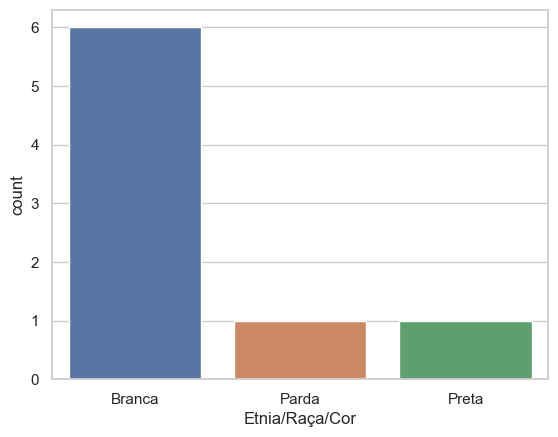

In [124]:
# O tópico de evasão é um dos mais importantes do projeto, nele pode-se observar algumas informações que serão muito importante para as 
# conclusões, no gráfico a seguir foi filtrado uma base de dados só com os alunos que evadiram em relação a raça/etnia/cor.
sns.countplot(x = dados_Evas['Etnia/Raça/Cor'])
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 15

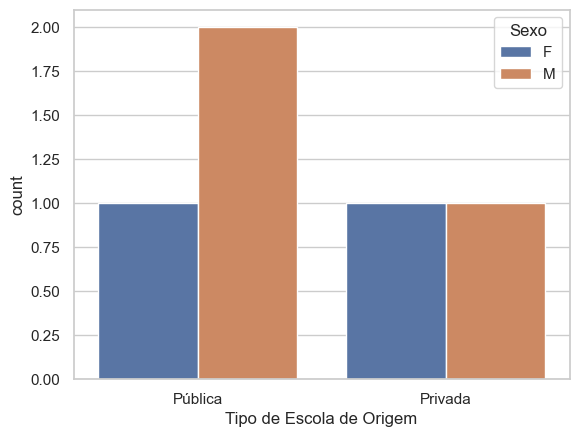

In [125]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública e
# homens que evadem mais. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()

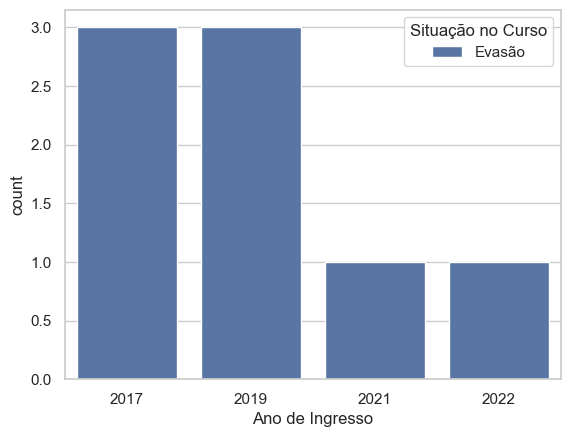

In [126]:
# Agora será analisado o número geral de evadidos, em todos os cursos e modalidades do campus, ao passar dos anos, 
# peecebendo um ápice em dois mil e dezoito e uma queda nos anos de pandemia, dois mil e vinte e vinte um.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Situação no Curso')
plt.show()

In [127]:
dados['Descrição do Curso'].value_counts()

MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA EM REDE NACIONAL (PROFEPT)    383
Name: Descrição do Curso, dtype: int64

# Deficiência

In [128]:
dados_Def = dados[dados['Deficiência']=='PCD']

In [129]:
dados['Deficiência'].value_counts()

Sem Necessidade Especial    368
PCD                          15
Name: Deficiência, dtype: int64

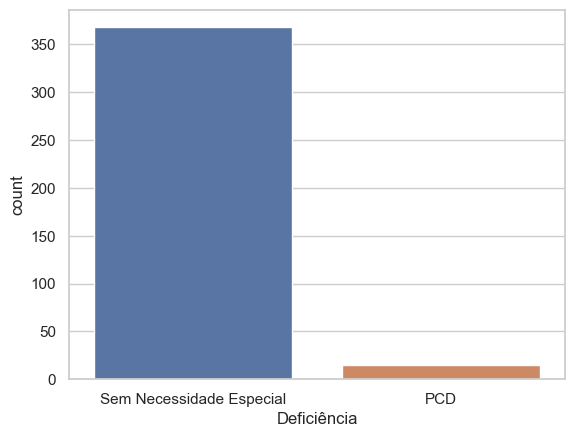

In [130]:
# O tópico de pessoas com deficiêcia (PCD) é importante para analisarmos o avanço do número geral desses alunos no campus 
# e muito importante para mostrar os avanços de acessibilidade do campus. No gráfico a seguir podemos ver a comparação de alunos PCD com alunos
# sem necessidades especiais.
sns.countplot(x = dados['Deficiência'])
plt.rcParams['xtick.labelsize'] = 8

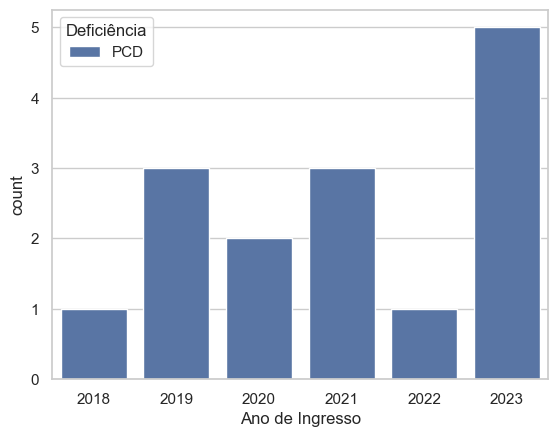

In [131]:
# A seguir será analisado a evolução no número de alunos PCD ao passar dos anos, mostrando um aumento substâncial nos anos de 
# dois mil e vinte um e vinte dois.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Ano de Ingresso', hue='Deficiência')
plt.show()

In [132]:
dados_Def['Ano de Ingresso'].value_counts()

2023    5
2019    3
2021    3
2020    2
2018    1
2022    1
Name: Ano de Ingresso, dtype: int64

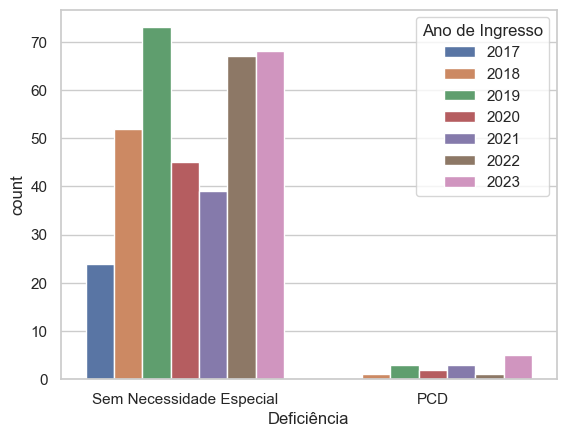

In [133]:
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Deficiência', hue='Ano de Ingresso')
plt.show()

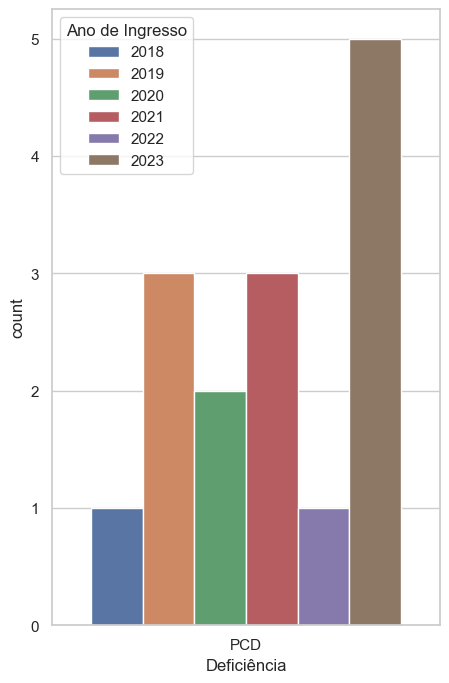

In [134]:
plt.figure(figsize= (5,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Deficiência', hue='Ano de Ingresso')
plt.show()

# Regras de Associação

In [135]:
!pip install apyori

In [136]:
import pandas as pd
from apyori import apriori


In [137]:
dados_Evas = dados_Evas.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [138]:
dados_Evas = dados_Evas.drop(["Descrição do Curso"],axis = 1)

In [140]:
dados_Evas = dados_Evas.drop(["Renda Per Capita"],axis = 1)

In [141]:
dados_Evas

,#,Ano de Ingresso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Sexo,Tipo de Escola de Origem
3204,3205,2017,SP,Branca,Exame de Seleção (Inativa),F,NaN
3677,3678,2022,RJ,Branca,Edital de Seleção NaN Aluno especial / Não reg...,M,Pública
6378,6379,2017,SP,Branca,Exame de Seleção (Inativa),F,NaN
6506,6507,2019,SP,Parda,"Ingresso pósNaNgraduação: preto, pardo ou indí...",F,Privada
7646,7647,2017,SP,Branca,Exame de Seleção (Inativa),M,NaN
7649,7650,2019,SP,Branca,Ingresso pósNaNgraduação: pessoa com deficiência,M,Privada
8621,8622,2019,SP,Preta,"Ingresso pósNaNgraduação: preto, pardo ou indí...",M,Pública
10464,10465,2021,SP,Branca,Ingresso pósNaNgraduação: ampla concorrência,F,Pública


In [179]:
dados_Evas.shape

(8, 7)

In [180]:
dados.shape

(383, 13)

In [144]:
Lista = []
for i in range(len(dados_Evas)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Evas.values[i, j]) for j in range(dados_Evas.shape[1])])

In [183]:
regras = apriori(Lista, min_support = 0.1, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

8

In [184]:
resultados

[RelationRecord(items=frozenset({'nan', '2020'}), support=0.2088888888888889, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2020'}), items_add=frozenset({'nan'}), confidence=1.0, lift=3.629032258064516)]),
 RelationRecord(items=frozenset({'nan', 'Edital de Seleção NaN Aluno especial / Não regular', '2020'}), support=0.2088888888888889, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2020'}), items_add=frozenset({'nan', 'Edital de Seleção NaN Aluno especial / Não regular'}), confidence=1.0, lift=4.787234042553191), OrderedStatistic(items_base=frozenset({'Edital de Seleção NaN Aluno especial / Não regular', '2020'}), items_add=frozenset({'nan'}), confidence=1.0, lift=3.629032258064516), OrderedStatistic(items_base=frozenset({'nan', 'Edital de Seleção NaN Aluno especial / Não regular'}), items_add=frozenset({'2020'}), confidence=1.0, lift=4.787234042553191)]),
 RelationRecord(items=frozenset({'nan', 'F', '2020'}), support=0.1288888888888889, ordered_statistics=[O

In [165]:
dados_Form = dados_Form.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [166]:
dados_Form = dados_Form.loc[dados['Situação no Curso'] == "Concluído"]

In [149]:
dados_Form = dados_Form.drop(["Renda Per Capita"],axis = 1)

In [186]:
dados_Form = dados_Form.drop(["Descrição do Curso"],axis = 1)

In [187]:
dados_Form

,#,Ano de Ingresso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Sexo,Tipo de Escola de Origem
25,26,2018,SP,Parda,Ampla Concorrência (Vestibular),F,Privada
28,29,2021,BA,Parda,Edital de Seleção NaN Aluno especial / Não reg...,M,Pública
37,38,2019,ES,Não declarado,Edital de Seleção NaN Aluno especial / Não reg...,M,Pública
111,112,2022,RJ,Parda,Edital de Seleção NaN Aluno especial / Não reg...,M,Pública
161,162,2017,SP,Parda,Exame de Seleção (Inativa),F,NaN
...,...,...,...,...,...,...,...
11242,11243,2020,MA,Parda,Edital de Seleção NaN Aluno especial / Não reg...,F,NaN
11245,11246,2019,MS,Branca,Edital de Seleção NaN Aluno especial / Não reg...,F,Pública
11368,11369,2021,PI,Parda,Edital de Seleção NaN Aluno especial / Não reg...,F,Pública
11560,11561,2019,RJ,Preta,Edital de Seleção NaN Aluno especial / Não reg...,M,Pública


In [188]:
Lista = []
for i in range(len(dados_Form)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Form.values[i, j]) for j in range(dados_Form.shape[1])])

In [189]:
regras = apriori(Lista, min_support = 0.09, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

5

In [190]:
resultados

[RelationRecord(items=frozenset({'SP', '2018'}), support=0.09777777777777778, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2018'}), items_add=frozenset({'SP'}), confidence=1.0, lift=3.409090909090909)]),
 RelationRecord(items=frozenset({'nan', '2020'}), support=0.2088888888888889, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2020'}), items_add=frozenset({'nan'}), confidence=1.0, lift=3.629032258064516)]),
 RelationRecord(items=frozenset({'nan', 'Edital de Seleção NaN Aluno especial / Não regular', '2020'}), support=0.2088888888888889, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2020'}), items_add=frozenset({'nan', 'Edital de Seleção NaN Aluno especial / Não regular'}), confidence=1.0, lift=4.787234042553191), OrderedStatistic(items_base=frozenset({'Edital de Seleção NaN Aluno especial / Não regular', '2020'}), items_add=frozenset({'nan'}), confidence=1.0, lift=3.629032258064516), OrderedStatistic(items_base=frozenset({'nan', 'Edital de Sele